## Steps for EDA:
- Import Necessary Libraries
- Load the data and Data dictionary (if available)
- Data Understanding
- Missing Value Check

## Importing Necessary Library

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
df=pd.read_csv("titanic_dataset.csv")
#https://drive.google.com/file/d/1plN-KWVopblsqOdgTYPn-O-zG5cWrkf7/view?usp=drive_link

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Problem Statement: Variables/Factors affected the survival of passengers

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing Value Check

In [9]:
# Percentage of missing values in each column
round(100*df.isnull().mean(),2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [11]:
## Cabin column has more than 40% of missing values so straight away dropping it
df=df.drop("Cabin",axis=1)

In [13]:
100*df.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [14]:
med=df["Age"].median()
df["Age"]=df["Age"].fillna(med)# Imputation

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [19]:
df=df[df["Embarked"].notna()]# dropping the rows which has missing values in Embarked column

In [20]:
df.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [22]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [23]:
df.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

In [24]:
extra_cols=["PassengerId","Name","Ticket"]
num_cols=["Age","Fare"]
cat_cols=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]

In [25]:
df=df.drop(extra_cols,axis=1)

In [26]:
df.shape

(889, 8)

In [27]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

## Univariate Analysis

### Numerical

Histplot of Age


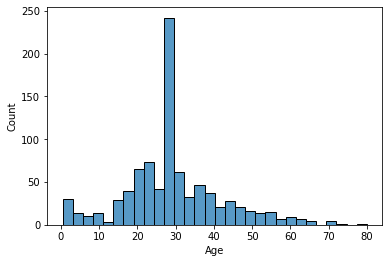

Histplot of Fare


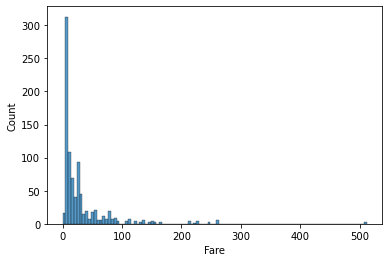

In [28]:
for i in num_cols:
    print("Histplot of",i)
    sns.histplot(x=df[i])
    plt.show()

Boxplot of Age


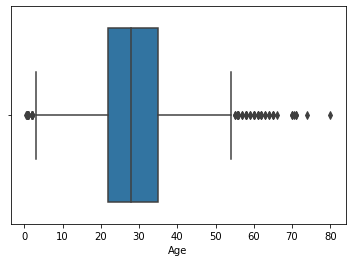

Boxplot of Fare


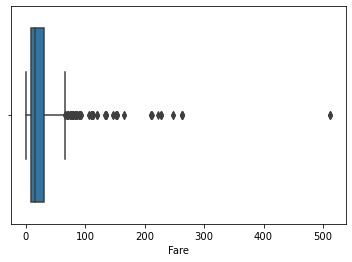

In [29]:
for i in num_cols:
    print("Boxplot of",i)
    sns.boxplot(x=df[i])
    plt.show()

### Categorical

Countplot of Survived


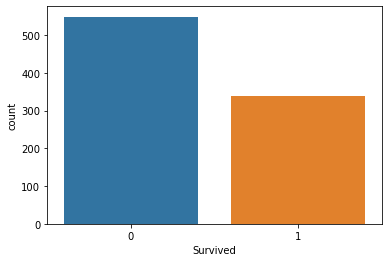

Countplot of Pclass


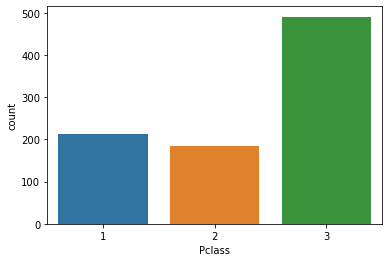

Countplot of Sex


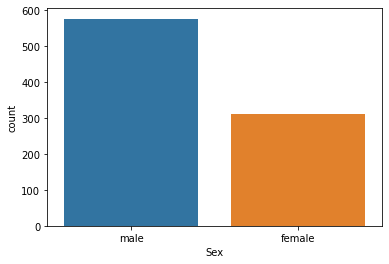

Countplot of SibSp


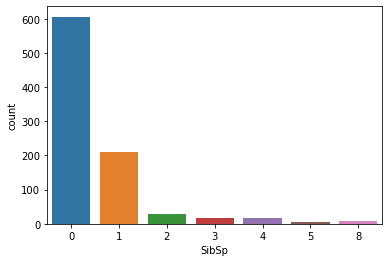

Countplot of Parch


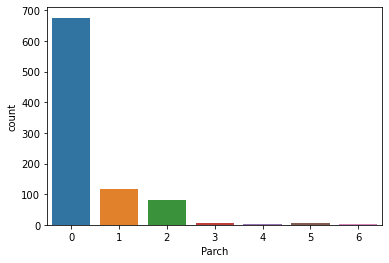

Countplot of Embarked


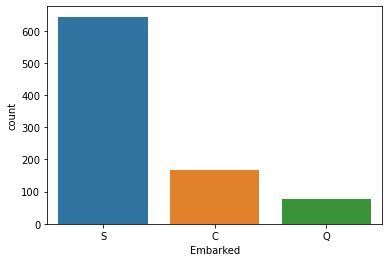

In [30]:
for i in cat_cols:
    print("Countplot of",i)
    sns.countplot(x=df[i])
    plt.show()

## Bivariate Analysis

### Numerical Vs Numerical

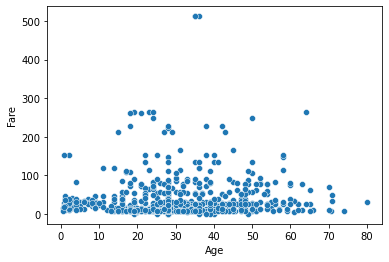

In [31]:
sns.scatterplot(x=df["Age"],y=df["Fare"])
plt.show()

### Numerical Vs Categorical

Boxplot of Survived Vs Age


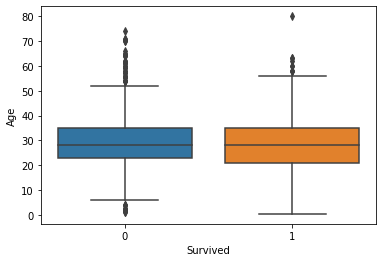

Boxplot of Survived Vs Fare


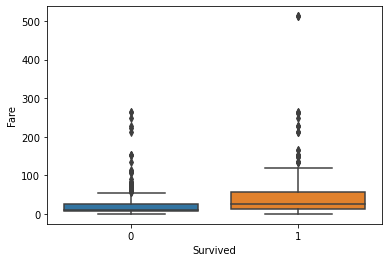

Boxplot of Pclass Vs Age


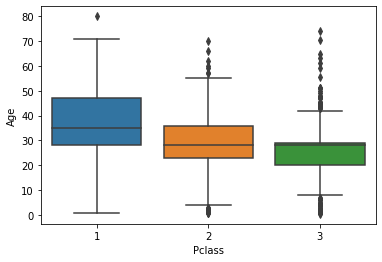

Boxplot of Pclass Vs Fare


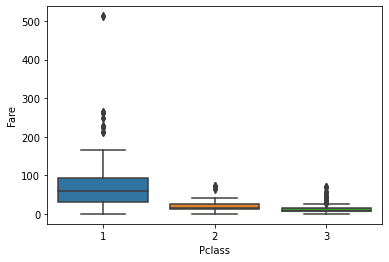

Boxplot of Sex Vs Age


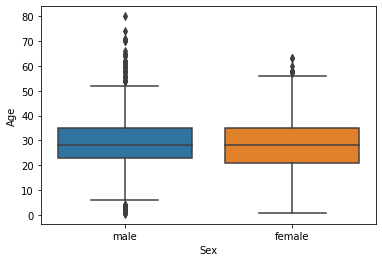

Boxplot of Sex Vs Fare


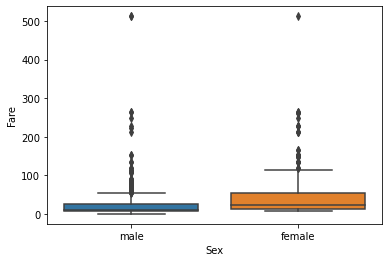

Boxplot of SibSp Vs Age


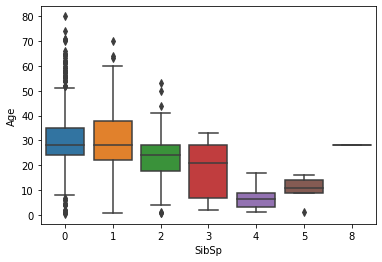

Boxplot of SibSp Vs Fare


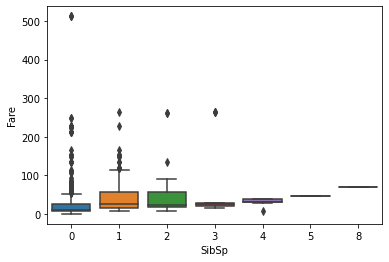

Boxplot of Parch Vs Age


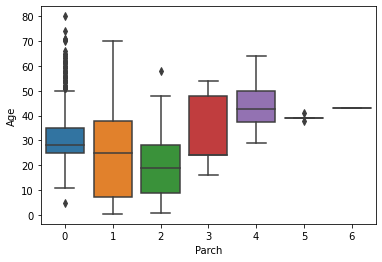

Boxplot of Parch Vs Fare


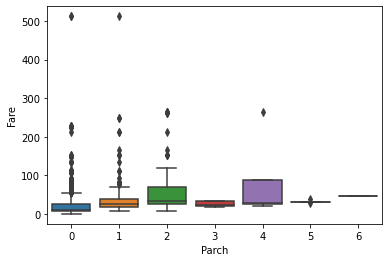

Boxplot of Embarked Vs Age


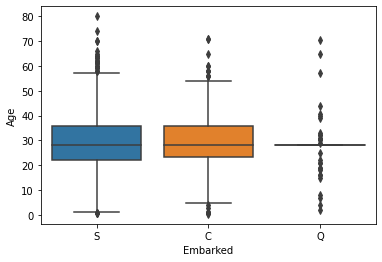

Boxplot of Embarked Vs Fare


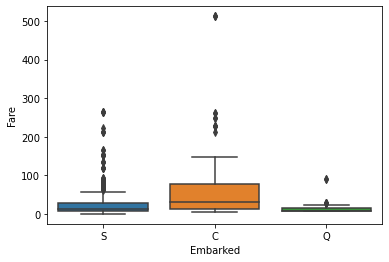

In [32]:
for col1 in cat_cols:
    for col2 in num_cols:
        print("Boxplot of",col1,"Vs",col2)
        sns.boxplot(x=df[col1],y=df[col2])
        plt.show()

# Categorical Vs Categorical

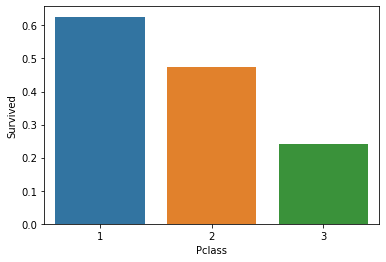

In [35]:
sns.barplot(x=df["Pclass"],y=df["Survived"],ci=None)
plt.show()

## Multivariate Analysis

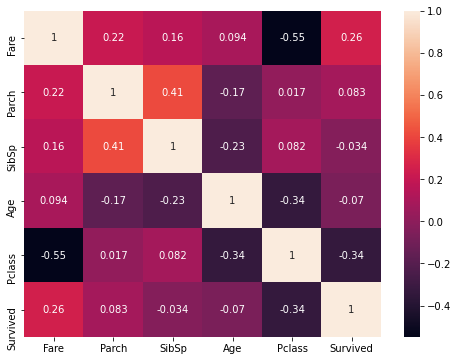

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["Fare","Parch","SibSp","Age","Pclass","Survived"]].corr(),annot=True)
plt.show()

In [ ]:
## Correlation represents strength of relationship between variables
## Correlation lies in the range of -1 to 1
## Negative correlation  (0 to -1) shows inverse relationship
## Positive correlation (0 to 1) shows direct relationship
## 0 correlation represents no relationship.